# Titanic Speed Start Machine Learning | Speedml

This notebook uses [Speedml Python package](https://pypi.python.org/pypi/speedml) to speed start your machine learning project.

It integrates best ML packages and popular strategies used by top data scientists in an easy to use Python package.

Then all you need to do is include one package in your project to get started. Speedml includes pandas, sklearn, numpy, xgboost, by default so you do not need to import these.

In [1]:
from speedml import Speedml

%matplotlib inline

In [2]:
sml = Speedml('../input/titanic/train.csv', 
              '../input/titanic/test.csv', 
              target = 'Survived',
              uid = 'PassengerId')
sml.shape()

Shape: train (891, 11) test (418, 10)
Numerical: train_n (6) test_n (5)


In [3]:
sml.train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


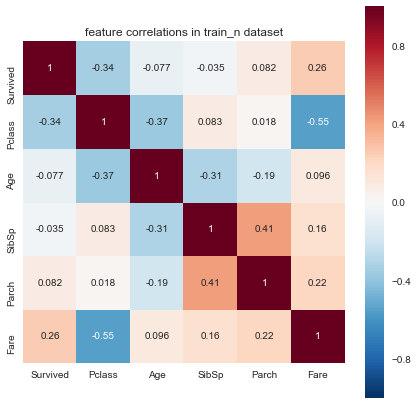

In [4]:
sml.plot.correlate()

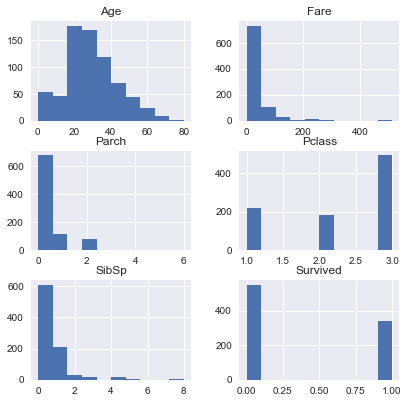

In [5]:
sml.plot.distribute()

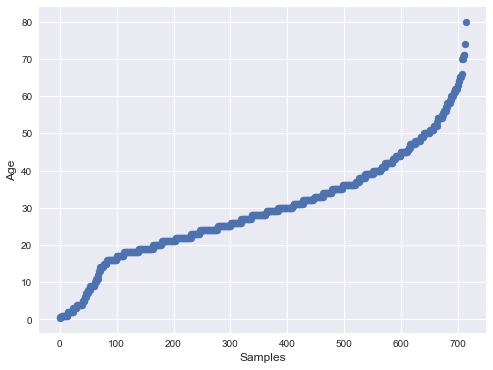

In [6]:
sml.plot.continuous('Age')

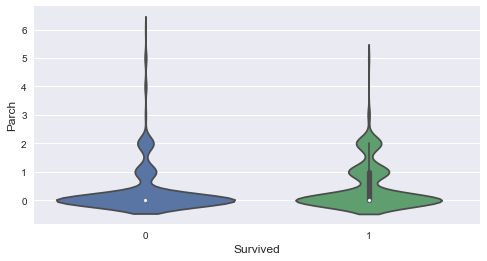

6 or 0.67% upper outliers fixed. 


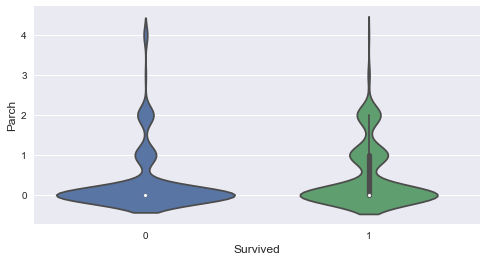

In [7]:
sml.plot.ordinal('Parch')
print(sml.feature.outliers('Parch', upper=99))
sml.plot.ordinal('Parch')

In [8]:
sml.feature.drop(['Ticket'])

'Dropped 1 features with 10 features available.'

In [9]:
sml.feature.fillna(a='Cabin', new='Z')
sml.feature.extract(new='Deck', a='Cabin', regex='([A-Z]){1}')
sml.feature.drop(['Cabin'])
sml.feature.mapping('Sex', {'male': 0, 'female': 1})
sml.feature.sum(new='FamilySize', a='Parch', b='SibSp')
sml.feature.add('FamilySize', 1)

In [10]:
sml.feature.drop(['Parch', 'SibSp'])

'Dropped 2 features with 9 features available.'

In [11]:
sml.feature.impute()

'Imputed 179 empty values to 0.'

In [12]:
sml.train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
Age           891 non-null float64
Deck          891 non-null object
Embarked      891 non-null object
FamilySize    891 non-null float64
Fare          891 non-null float64
Name          891 non-null object
Pclass        891 non-null int64
Sex           891 non-null int64
Survived      891 non-null int64
dtypes: float64(3), int64(3), object(3)
memory usage: 69.6+ KB


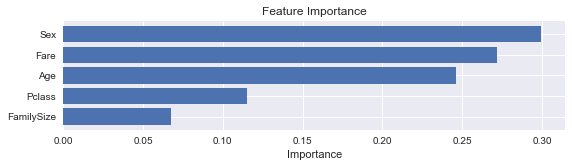

In [13]:
sml.plot.importance()

In [14]:
sml.train.head()

,Age,Deck,Embarked,FamilySize,Fare,Name,Pclass,Sex,Survived
0,22.0,Z,S,2.0,7.2500,"Braund, Mr. Owen Harris",3,0,0
1,38.0,C,C,2.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1
2,26.0,Z,S,1.0,7.9250,"Heikkinen, Miss. Laina",3,1,1
3,35.0,C,S,2.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1
4,35.0,Z,S,1.0,8.0500,"Allen, Mr. William Henry",3,0,0


In [15]:
sml.feature.extract(new='Title', a='Name', regex=' ([A-Za-z]+)\.')
sml.plot.crosstab('Title', 'Sex')

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [16]:
sml.feature.replace(a='Title', match=['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], new='Rare')

'Replaced matching list of strings across train and test datasets.'

In [17]:
sml.feature.replace('Title', 'Mlle', 'Miss')

'Replaced 2 matching values across train and test datasets.'

In [18]:
sml.feature.replace('Title', 'Ms', 'Miss')

'Replaced 2 matching values across train and test datasets.'

In [19]:
sml.feature.replace('Title', 'Mme', 'Mrs')

'Replaced 1 matching values across train and test datasets.'

In [20]:
sml.train[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [21]:
sml.feature.drop(['Name'])
sml.feature.labels(['Title', 'Embarked', 'Deck'])
sml.train.head()

,Age,Deck,Embarked,FamilySize,Fare,Pclass,Sex,Survived,Title
0,22.0,8,2,2.0,7.2500,3,0,0,2
1,38.0,2,0,2.0,71.2833,1,1,1,3
2,26.0,8,2,1.0,7.9250,3,1,1,1
3,35.0,2,2,2.0,53.1000,1,1,1,3
4,35.0,8,2,1.0,8.0500,3,0,0,2


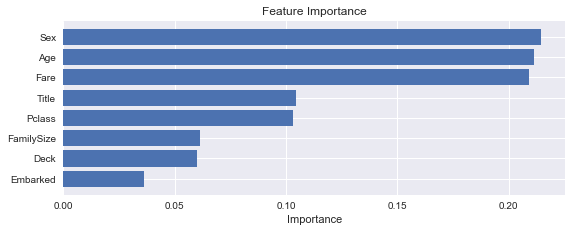

In [22]:
sml.plot.importance()

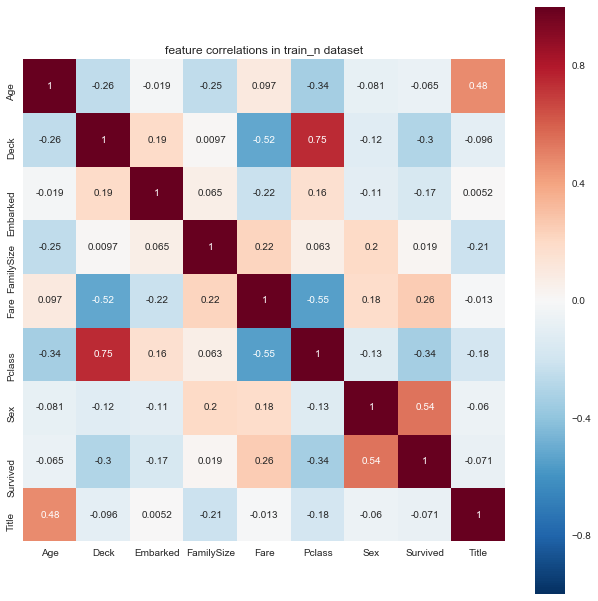

In [23]:
sml.plot.correlate()

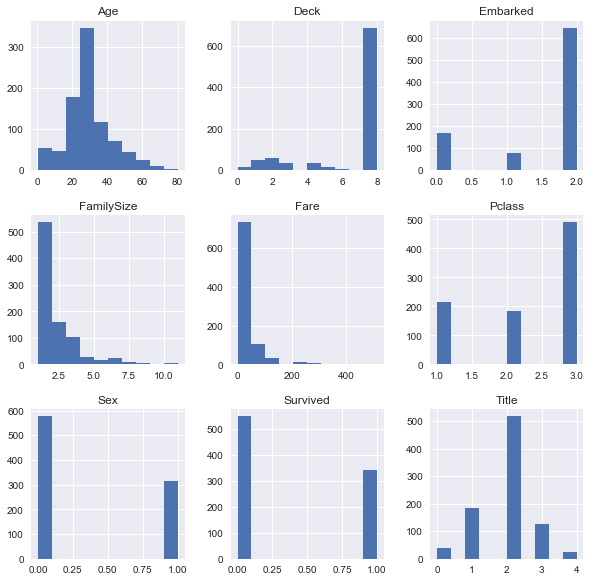

In [24]:
sml.plot.distribute()

In [25]:
sml.model.data()

'train_X: (891, 8) train_y: (891,) test_X: (418, 8)'

## Hyper-parameters Tuning

This is an important step in the workflow. We optimize the hyper-parameters used for our XGBoost classifier to get the best results. We do this iteratively by setting certain hyper-parameters as fixed while checking permutations for two select parameters at a time.

The resulting table ranks the permutations based on accuracy, highest rank = 1.

We now substitute the highest ranking parameters as fixed in the next round of optimization, selecting an alternate pair of parameters to optimize this time. Repeat this process for as many parameters as required. Normally two rounds of tuning is sufficient.

In [26]:
select_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
fixed_params = {'learning_rate': 0.1, 'subsample': 0.8, 
                'colsample_bytree': 0.8, 'seed':0, 
                'objective': 'binary:logistic'}

sml.xgb.hyper(select_params, fixed_params)

,rank,params
7,1,"{'max_depth': 7, 'min_child_weight': 3}"
4,2,"{'max_depth': 5, 'min_child_weight': 3}"
8,2,"{'max_depth': 7, 'min_child_weight': 5}"
5,4,"{'max_depth': 5, 'min_child_weight': 5}"
3,5,"{'max_depth': 5, 'min_child_weight': 1}"
6,5,"{'max_depth': 7, 'min_child_weight': 1}"
0,7,"{'max_depth': 3, 'min_child_weight': 1}"
1,8,"{'max_depth': 3, 'min_child_weight': 3}"
2,8,"{'max_depth': 3, 'min_child_weight': 5}"


In [27]:
select_params = {'learning_rate': [0.3, 0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
fixed_params = {'max_depth': 7, 'min_child_weight': 3, 
                'colsample_bytree': 0.8, 'seed':0, 
                'objective': 'binary:logistic'}

sml.xgb.hyper(select_params, fixed_params)

,rank,params
4,1,"{'learning_rate': 0.1, 'subsample': 0.8}"
3,2,"{'learning_rate': 0.1, 'subsample': 0.7}"
5,3,"{'learning_rate': 0.1, 'subsample': 0.9}"
1,4,"{'learning_rate': 0.3, 'subsample': 0.8}"
0,5,"{'learning_rate': 0.3, 'subsample': 0.7}"
2,6,"{'learning_rate': 0.3, 'subsample': 0.9}"
8,7,"{'learning_rate': 0.01, 'subsample': 0.9}"
7,8,"{'learning_rate': 0.01, 'subsample': 0.8}"
6,9,"{'learning_rate': 0.01, 'subsample': 0.7}"


In [28]:
tuned_params = {'learning_rate': 0.1, 'subsample': 0.8, 
                'max_depth': 3, 'min_child_weight': 5,
                'seed':0, 'colsample_bytree': 0.8, 
                'objective': 'binary:logistic'}
sml.xgb.cv(tuned_params)

In [29]:
sml.xgb.cv_results.tail(5)

,test-error-mean,test-error-std,train-error-mean,train-error-std
22,0.180899,0.006552,0.150843,0.006683
23,0.183146,0.008408,0.151966,0.006671
24,0.180899,0.007453,0.150562,0.006243
25,0.178651,0.008257,0.151123,0.006683
26,0.176404,0.004494,0.150000,0.007183


In [30]:
tuned_params['n_estimators'] = sml.xgb.cv_results.shape[0] - 1
sml.xgb.params(tuned_params)

In [31]:
sml.xgb.classifier()

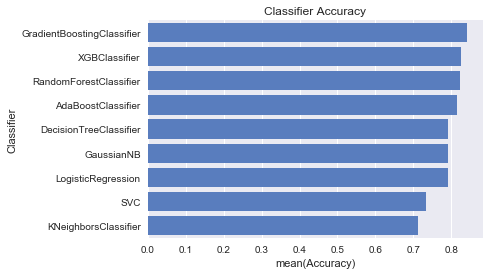

In [32]:
sml.model.evaluate()
sml.plot.model_ranks()

In [33]:
sml.model.ranks()

,Classifier,Accuracy
0,GradientBoostingClassifier,0.840000
0,XGBClassifier,0.824444
0,RandomForestClassifier,0.823333
0,AdaBoostClassifier,0.814444
0,DecisionTreeClassifier,0.792222
0,GaussianNB,0.790000
0,LogisticRegression,0.790000
0,SVC,0.732222
0,KNeighborsClassifier,0.711111


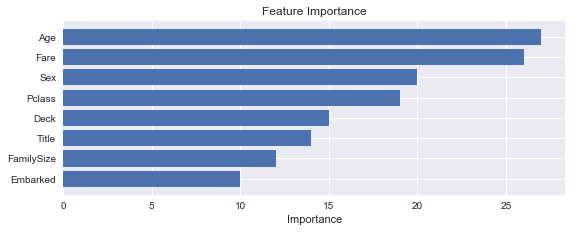

In [34]:
sml.xgb.fit()
sml.xgb.predict()

# This API requires folder named data (next to this notebook).
# This will write XGB feature mapping file.
# Won't work on Kaggle without write permissions.
# Uncomment when working on solution on your laptop to see XGB assigned feature importance.

sml.plot.xgb_importance()

In [35]:
sml.xgb.feature_selection()

Accuracy: 78.73%
Thresh=0.035, n=8, Accuracy: 78.73%
Thresh=0.061, n=7, Accuracy: 78.73%
Thresh=0.065, n=6, Accuracy: 77.99%
Thresh=0.077, n=5, Accuracy: 79.10%
Thresh=0.087, n=4, Accuracy: 76.87%
Thresh=0.116, n=3, Accuracy: 69.03%
Thresh=0.205, n=2, Accuracy: 69.40%
Thresh=0.354, n=1, Accuracy: 69.40%


In [36]:
sml.xgb.sample_accuracy()

'Accuracy = 84.96%. Found 757 correct of 891 total labels'

In [37]:
# This will only work on your laptop as Kaggle does not provide write permissions.
sml.save_results(
    columns={ 'PassengerId': sml.uid,
             'Survived': sml.xgb.predictions }, 
    file_path='data/speedml-submission-{}.csv'\
    .format(sml.xgb.accuracy))

'Results saved.'